In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import newgcforest

from newgcforest.gcforest import GCForest
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r'D:/Python项目/购买行为预测/平衡后总数据.csv')
df=data[['user_id','item_id','item_category','u_click_number','u_collection','u_add_number','u_purchasing','c_to_p','C_to_p','a_to_p','click','collection_y','add','rebuy']]

### 设置训练集和测试集的输入和输出

In [3]:
import random
random.seed(96)
indices = np.random.permutation(len(df))    # 打乱df的行索引
train_indicer=indices[:int(len(df)*0.7)]   # 取被打乱后行索引的前70%   
test_indicer=indices[int(len(df)*0.7):]    # 取被打乱后行索引的后30%
train_data=df.iloc[train_indicer]  
test_data=df.iloc[test_indicer]

In [4]:
train=train_data.reset_index(drop=True)
test=train_data.reset_index(drop=True)
train_data.head()

,user_id,item_id,item_category,u_click_number,u_collection,u_add_number,u_purchasing,c_to_p,C_to_p,a_to_p,click,collection_y,add,rebuy
21554,38992559,3294895,363,896,37,24,8,0.059,1.0,0.500,17,1,2,0.0
5201,4210565,273569679,6344,1600,13,39,33,0.096,9.0,0.818,20,1,2,1.0
28022,36181625,179496769,7021,1020,2,19,9,0.067,0.0,1.000,2,0,1,0.0
9006,124746041,33856239,12855,5319,3,83,28,0.074,1.0,2.000,6,0,1,1.0
12236,4298117,94855783,3339,1128,3,71,30,1.000,0.0,3.000,3,0,1,1.0


In [5]:

# 按7:3随机取训练集和测试集
train=train_data.reset_index(drop=True)
test=test_data.reset_index(drop=True)

X_tr=np.array(train[['user_id','item_id','item_category','u_click_number','u_collection','u_add_number','u_purchasing','c_to_p','C_to_p','a_to_p','click','collection_y','add']])
X_te=np.array(test[['user_id','item_id','item_category','u_click_number','u_collection','u_add_number','u_purchasing','c_to_p','C_to_p','a_to_p','click','collection_y','add']])
y_tr=np.array(train[['rebuy']])
y_te=np.array(test[['rebuy']])

# from sklearn import preprocessing
# X_tr=preprocessing.scale(X_tr2)
# X_te=preprocessing.scale(X_te2)



### 深度森林预测

In [6]:
def get_toy_config():
    config = {}
    ca_config = {}
    ca_config["random_state"] = 0
    ca_config["max_layers"] = 100 ##最大层数
    ca_config["early_stopping_rounds"] = 3 
    ca_config["n_classes"] = 2 ##类别数
    
#     # 增加自己的条件
#     ca_config["shape_1X"] = 10
#     ca_config["window"] = 1
#     ca_config["n_cascadeRF"] = 2
#     ca_config["n_mgsRFtree"] = 100
#     ca_config["n_cascadeRFtree"] = 150
    
    ##选择级联森林的基模型
    ca_config["estimators"] = []
    ca_config["estimators"].append(
            {"n_folds": 10, "type": "XGBClassifier", "n_estimators": 30, "max_depth": 5,
             "objective": "multi:softprob", "silent": True, "nthread": 0, "learning_rate": 0.5,"num_class":2} )
    ca_config["estimators"].append(
            {"n_folds": 10, "type": "XGBClassifier", "n_estimators":30, "max_depth": 5,
             "objective": "multi:softprob", "silent": True, "nthread": 0, "learning_rate": 0.5,"num_class":2} )
#    ca_config["estimators"].append({"n_folds": 10, "type": "RandomForestClassifier", "n_estimators": 10, "max_depth": 15, "n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 10, "type": "ExtraTreesClassifier", "n_estimators": 10, "max_depth":20,"n_jobs": -1})
    ca_config["estimators"].append({"n_folds": 10, "type": "ExtraTreesClassifier", "n_estimators": 10, "max_depth":20, "n_jobs": -1})
#    ca_config["estimators"].append({"n_folds": 1, "type": "LogisticRegression"})
    config["cascade"] = ca_config
    return config

In [7]:
# 构建模型
model=GCForest(get_toy_config())
Y_tr=y_tr.T[0]

In [8]:
# 训练模型
model.fit_transform(X_tr,Y_tr)

[ 2021-06-24 10:57:42,517][cascade_classifier.fit_transform] X_groups_train.shape=[(43203, 13)],y_train.shape=(43203,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2021-06-24 10:57:42,542][cascade_classifier.fit_transform] group_dims=[13]
[ 2021-06-24 10:57:42,547][cascade_classifier.fit_transform] group_starts=[0]
[ 2021-06-24 10:57:42,551][cascade_classifier.fit_transform] group_ends=[13]
[ 2021-06-24 10:57:42,553][cascade_classifier.fit_transform] X_train.shape=(43203, 13),X_test.shape=(0, 13)
[ 2021-06-24 10:57:42,576][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(43203, 13), X_cur_test.shape=(0, 13)


[10:57:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:46,575][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_0.predict)=90.81%


[10:57:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:49,517][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_1.predict)=89.63%


[10:57:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:51,415][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_2.predict)=90.05%


[10:57:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:53,152][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_3.predict)=90.77%


[10:57:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:54,930][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_4.predict)=89.91%


[10:57:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:56,518][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_5.predict)=90.14%


[10:57:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:57:58,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_6.predict)=90.76%


[10:57:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:00,137][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_7.predict)=89.95%


[10:58:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:02,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_8.predict)=90.81%


[10:58:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:03,660][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_9.predict)=90.09%
[ 2021-06-24 10:58:03,664][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 10_folds.train_cv.predict)=90.29%


[10:58:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:05,245][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_0.predict)=90.81%


[10:58:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:07,081][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_1.predict)=90.23%


[10:58:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:08,927][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_2.predict)=89.98%


[10:58:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:10,587][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_3.predict)=89.72%


[10:58:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:12,435][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_4.predict)=90.74%


[10:58:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:14,031][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_5.predict)=90.12%


[10:58:14] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:15,535][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_6.predict)=90.62%


[10:58:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:17,215][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_7.predict)=90.39%


[10:58:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:18,780][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_8.predict)=90.49%


[10:58:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:20,452][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_9.predict)=90.95%
[ 2021-06-24 10:58:20,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_1 - 10_folds.train_cv.predict)=90.41%
d:\vividownload\python\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
[ 2021-06-24 10:58:21,051][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_2 - 10_folds.train_0.predict)=86.99%
[ 2021-06-24 10:58:21,570][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_2 - 10_folds.train_1.predict)=86.16%
[ 2021-06-24 10:58:22,105][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_2 - 10_folds.train_2.predict)=87.20%
[ 2021-06-24 10:58:22,640][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_2 - 10_folds.tr

[10:58:31] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:36,510][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_0.predict)=90.12%


[10:58:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:39,548][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_1.predict)=90.23%


[10:58:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:42,112][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_2.predict)=90.84%


[10:58:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:44,681][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_3.predict)=91.21%


[10:58:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:47,261][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_4.predict)=90.05%


[10:58:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:49,767][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_5.predict)=90.74%


[10:58:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:52,263][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_6.predict)=90.51%


[10:58:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:54,839][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_7.predict)=90.00%


[10:58:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:57,370][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_8.predict)=90.30%


[10:58:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:58:59,903][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_9.predict)=90.28%
[ 2021-06-24 10:58:59,908][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_0 - 10_folds.train_cv.predict)=90.43%


[10:59:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:02,487][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_0.predict)=90.23%


[10:59:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:05,040][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_1.predict)=90.23%


[10:59:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:07,695][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_2.predict)=90.67%


[10:59:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:10,411][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_3.predict)=91.11%


[10:59:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:13,284][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_4.predict)=90.58%


[10:59:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:15,905][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_5.predict)=90.32%


[10:59:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:18,471][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_6.predict)=90.44%


[10:59:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:21,001][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_7.predict)=90.16%


[10:59:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:23,555][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_8.predict)=90.79%


[10:59:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:26,074][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_9.predict)=90.23%
[ 2021-06-24 10:59:26,080][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_1 - 10_folds.train_cv.predict)=90.48%
[ 2021-06-24 10:59:26,510][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_0.predict)=89.89%
[ 2021-06-24 10:59:27,171][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_1.predict)=90.37%
[ 2021-06-24 10:59:27,820][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_2.predict)=90.42%
[ 2021-06-24 10:59:28,468][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_3.predict)=89.77%
[ 2021-06-24 10:59:29,110][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_4.predict)=90.32%
[ 2021-06-24 10:59:29,754][kfold_wrapper.log_eval_metrics] Accuracy(layer_1 - estimator_2 - 10_folds.train_5.predict)=89.65%

[10:59:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:44,456][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_0.predict)=90.09%


[10:59:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:47,653][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_1.predict)=90.56%


[10:59:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:50,271][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_2.predict)=90.28%


[10:59:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:52,717][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_3.predict)=90.70%


[10:59:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:55,241][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_4.predict)=90.44%


[10:59:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 10:59:57,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_5.predict)=90.23%


[10:59:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:00,214][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_6.predict)=90.67%


[11:00:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:02,671][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_7.predict)=90.44%


[11:00:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:05,243][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_8.predict)=89.77%


[11:00:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:07,916][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_9.predict)=90.55%
[ 2021-06-24 11:00:07,920][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_0 - 10_folds.train_cv.predict)=90.37%


[11:00:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:10,574][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_0.predict)=89.84%


[11:00:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:13,727][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_1.predict)=90.49%


[11:00:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:16,474][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_2.predict)=90.67%


[11:00:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:19,070][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_3.predict)=90.07%


[11:00:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:21,591][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_4.predict)=90.19%


[11:00:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:24,216][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_5.predict)=91.20%


[11:00:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:26,928][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_6.predict)=90.42%


[11:00:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:29,547][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_7.predict)=90.39%


[11:00:29] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:32,101][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_8.predict)=90.53%


[11:00:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:34,604][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_9.predict)=89.95%
[ 2021-06-24 11:00:34,608][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 10_folds.train_cv.predict)=90.38%
[ 2021-06-24 11:00:35,036][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_0.predict)=89.33%
[ 2021-06-24 11:00:35,633][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_1.predict)=90.19%
[ 2021-06-24 11:00:36,170][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_2.predict)=90.07%
[ 2021-06-24 11:00:36,814][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_3.predict)=89.91%
[ 2021-06-24 11:00:37,470][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_4.predict)=90.90%
[ 2021-06-24 11:00:38,002][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 10_folds.train_5.predict)=89.63%

[11:00:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:51,655][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_0.predict)=89.96%


[11:00:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:54,812][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_1.predict)=90.09%


[11:00:54] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:57,441][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_2.predict)=90.97%


[11:00:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:00:59,951][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_3.predict)=90.00%


[11:01:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:02,446][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_4.predict)=90.37%


[11:01:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:04,938][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_5.predict)=90.32%


[11:01:05] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:07,513][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_6.predict)=90.49%


[11:01:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:09,986][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_7.predict)=90.02%


[11:01:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:12,464][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_8.predict)=89.49%


[11:01:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:15,120][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_9.predict)=90.18%
[ 2021-06-24 11:01:15,124][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_0 - 10_folds.train_cv.predict)=90.19%


[11:01:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:17,713][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_0.predict)=90.21%


[11:01:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:20,168][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_1.predict)=89.98%


[11:01:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:22,689][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_2.predict)=90.14%


[11:01:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:25,181][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_3.predict)=89.89%


[11:01:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:27,711][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_4.predict)=89.79%


[11:01:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:30,237][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_5.predict)=90.32%


[11:01:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:32,779][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_6.predict)=90.44%


[11:01:32] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:35,313][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_7.predict)=89.51%


[11:01:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:38,116][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_8.predict)=90.53%


[11:01:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:40,657][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_9.predict)=89.93%
[ 2021-06-24 11:01:40,662][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_1 - 10_folds.train_cv.predict)=90.07%
[ 2021-06-24 11:01:41,080][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_0.predict)=89.91%
[ 2021-06-24 11:01:41,693][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_1.predict)=90.56%
[ 2021-06-24 11:01:42,342][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_2.predict)=90.60%
[ 2021-06-24 11:01:42,880][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_3.predict)=90.81%
[ 2021-06-24 11:01:43,526][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_4.predict)=89.49%
[ 2021-06-24 11:01:44,049][kfold_wrapper.log_eval_metrics] Accuracy(layer_3 - estimator_2 - 10_folds.train_5.predict)=90.02%

[11:01:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:01:58,101][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_0.predict)=89.79%


[11:01:58] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:01,348][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_1.predict)=90.03%


[11:02:01] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:04,103][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_2.predict)=90.26%


[11:02:04] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:06,781][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_3.predict)=89.98%


[11:02:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:09,684][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_4.predict)=90.44%


[11:02:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:12,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_5.predict)=89.93%


[11:02:12] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:15,139][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_6.predict)=90.19%


[11:02:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:17,705][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_7.predict)=89.84%


[11:02:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:20,393][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_8.predict)=90.16%


[11:02:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:22,893][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_9.predict)=90.58%
[ 2021-06-24 11:02:22,897][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_0 - 10_folds.train_cv.predict)=90.12%


[11:02:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:25,489][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_0.predict)=90.35%


[11:02:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:28,009][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_1.predict)=90.56%


[11:02:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:30,561][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_2.predict)=89.56%


[11:02:30] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:33,058][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_3.predict)=89.61%


[11:02:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:35,543][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_4.predict)=90.35%


[11:02:35] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:38,126][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_5.predict)=90.67%


[11:02:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:40,615][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_6.predict)=89.79%


[11:02:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:43,110][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_7.predict)=90.42%


[11:02:43] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:45,625][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_8.predict)=89.98%


[11:02:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[ 2021-06-24 11:02:48,276][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_9.predict)=89.79%
[ 2021-06-24 11:02:48,281][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_1 - 10_folds.train_cv.predict)=90.11%
[ 2021-06-24 11:02:48,727][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_0.predict)=89.72%
[ 2021-06-24 11:02:49,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_1.predict)=90.47%
[ 2021-06-24 11:02:50,015][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_2.predict)=89.84%
[ 2021-06-24 11:02:50,675][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_3.predict)=89.26%
[ 2021-06-24 11:02:51,318][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_4.predict)=88.98%
[ 2021-06-24 11:02:51,981][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_2 - 10_folds.train_5.predict)=89.65%

array([[0.99505687, 0.00494319, 0.9989808 , ..., 0.0052169 , 0.99889296,
        0.00110701],
       [0.00473273, 0.9952673 , 0.00781913, ..., 0.99722224, 0.00204707,
        0.99795294],
       [0.94670784, 0.0532921 , 0.9673052 , ..., 0.04960487, 0.9324094 ,
        0.06759058],
       ...,
       [0.41346174, 0.58653826, 0.2681521 , ..., 0.87142855, 0.16918314,
        0.83081686],
       [0.9354846 , 0.06451542, 0.9315053 , ..., 0.18573321, 0.79173297,
        0.208267  ],
       [0.99814665, 0.00185335, 0.9969081 , ..., 0.00737328, 0.996114  ,
        0.00388596]], dtype=float32)

### 预测值

In [9]:
pre_y=model.predict(X_te)

[ 2021-06-24 11:03:01,332][cascade_classifier.transform] X_groups_test.shape=[(18516, 13)]
[ 2021-06-24 11:03:01,342][cascade_classifier.transform] group_dims=[13]
[ 2021-06-24 11:03:01,350][cascade_classifier.transform] X_test.shape=(18516, 13)
[ 2021-06-24 11:03:01,360][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(18516, 13)
[ 2021-06-24 11:03:05,130][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(18516, 21)


In [10]:
# 模型评估精确度
accuracy = accuracy_score(y_true=y_te, y_pred=pre_y)
'gcForest accuracy : {}'.format(accuracy)

'gcForest accuracy : 0.9075934327068481'

In [11]:
# 调用库里的AUC计算公式
from sklearn.metrics import roc_auc_score
roc_auc_score(pre_y,y_te)

0.9009565375265811

### 计算查全率、召回率、F1值

In [12]:
# 真正例TP值
TP=sum((y_te.reshape(1,-1)[0]==1)&(pre_y.reshape(1,-1)[0]==1))
FN=sum((y_te.reshape(1,-1)[0]==1)&(pre_y.reshape(1,-1)[0]==0))
FP=sum((y_te.reshape(1,-1)[0]==0)&(pre_y.reshape(1,-1)[0]==1))
p=np.around(TP/(TP+FP),4)
r=np.around(TP/(TP+FN),4)
f1=np.around((2*r*p)/(r+p),4)
print('查准率：',p)
print('召回率：',r)
print('F1值：',f1)

查准率： 0.8833
召回率： 0.8311
F1值： 0.8564


### 混淆矩阵

In [13]:
import sklearn.metrics as metrics
import itertools

Normalized confusion matrix


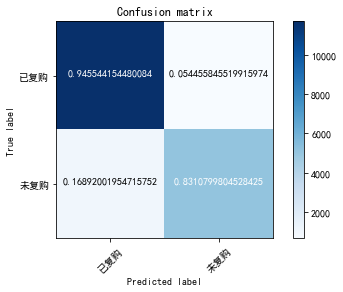

In [14]:
# 使图表可显示中文
plt.rcParams[u'font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False     

# 设置图表名称与大小
gcf_matrix = metrics.confusion_matrix(y_te, pre_y)
plt.imshow(gcf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
classes=list(np.array(['已复购','未复购']))
tick_marks = np.arange(len(classes))
plt.xticks(np.array([0,1]), classes, rotation=45)
plt.yticks(np.array([0,1]), classes)

# 计算混淆矩阵比例值
normalize=True
if normalize:
    gcf_matrix = gcf_matrix.astype('float') / gcf_matrix.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
else:
    print('Confusion matrix, without normalization')

thresh = gcf_matrix.max() / 2.
for i, j in itertools.product(range(gcf_matrix.shape[0]), range(gcf_matrix.shape[1])):
    plt.text(j, i, gcf_matrix[i, j],
             horizontalalignment="center",
             color="white" if gcf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()